<a href="https://colab.research.google.com/github/Kishorsam/Its-sam-page/blob/main/Copy_of_corizo_stock_price_prediction_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('Stock Price Prediction.csv.xlsx')

In [ ]:
print("First few rows of the dataset:")
print(data.head())

print("\nChecking for missing values:")
print(data.isnull().sum())
data.dropna(inplace=True)

First few rows of the dataset:
        Date        Open        High         Low       Close   Adj Close  \
0 2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1 2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2 2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3 2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4 2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  

Checking for missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
print("\nBasic statistics of the dataset:")
print(data.describe())


Basic statistics of the dataset:
                                Date         Open         High          Low  \
count                           1009  1009.000000  1009.000000  1009.000000   
mean   2020-02-05 07:30:58.870168320   419.059673   425.320703   412.374044   
min              2018-02-05 00:00:00   233.919998   250.649994   231.229996   
25%              2019-02-06 00:00:00   331.489990   336.299988   326.000000   
50%              2020-02-06 00:00:00   377.769989   383.010010   370.880005   
75%              2021-02-05 00:00:00   509.130005   515.630005   502.529999   
max              2022-02-04 00:00:00   692.349976   700.989990   686.090027   
std                              NaN   108.537532   109.262960   107.555867   

             Close    Adj Close        Volume  
count  1009.000000  1009.000000  1.009000e+03  
mean    419.000733   419.000733  7.570685e+06  
min     233.880005   233.880005  1.144000e+06  
25%     331.619995   331.619995  4.091900e+06  
50%     378.67

In [ ]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']


In [ ]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# Train each model and evaluate performance
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} Mean Squared Error: {mse}')

Linear Regression Mean Squared Error: 15.976946096942235
Decision Tree Mean Squared Error: 50.382511736119774
Random Forest Mean Squared Error: 27.71261922965426


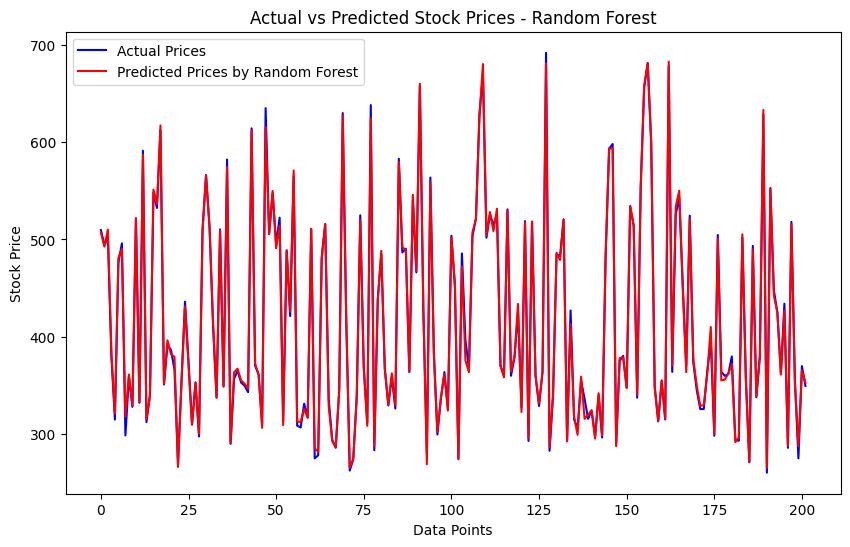

In [ ]:
 # Plot actual vs predicted values
 plt.figure(figsize=(10, 6))
 plt.plot(y_test.values, label='Actual Prices', color='blue')
 plt.plot(y_pred, label=f'Predicted Prices by {name}', color='red')
 plt.title(f'Actual vs Predicted Stock Prices - {name}')
 plt.xlabel('Data Points')
 plt.ylabel('Stock Price')
 plt.legend()
 plt.show()


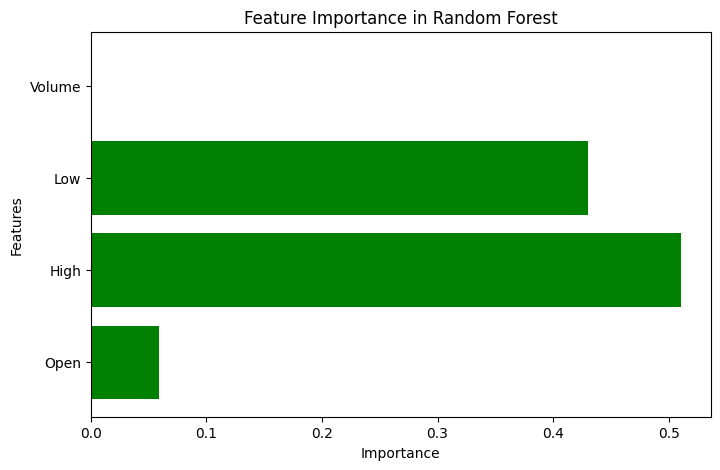

In [ ]:
# Feature importance from Random Forest model
model_rf = models['Random Forest']
importances = model_rf.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='green')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

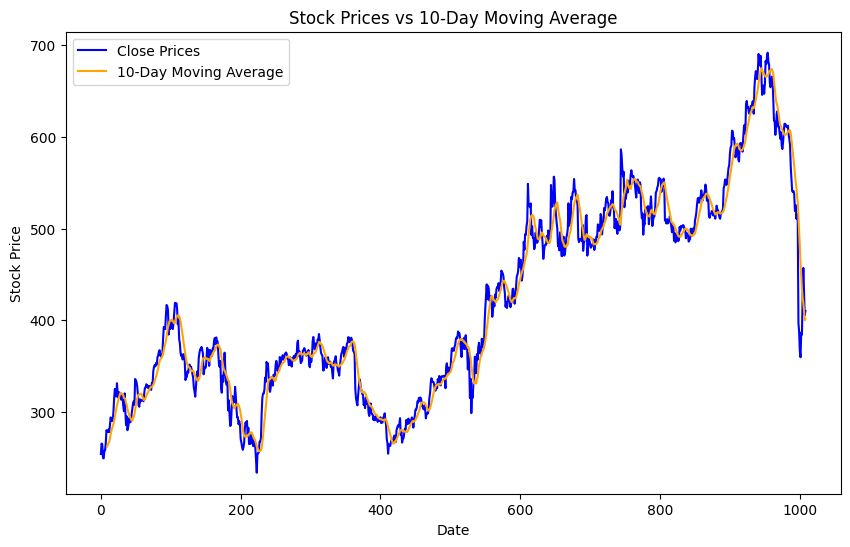

In [ ]:
# Moving Average (SMA) - Simple Moving Average over 10 days
data['SMA10'] = data['Close'].rolling(window=10).mean()

# Plotting the closing prices and SMA
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Prices', color='blue')
plt.plot(data['SMA10'], label='10-Day Moving Average', color='orange')
plt.title('Stock Prices vs 10-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()